## Importing Libraries :

#### Basic Python Libraries: 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#### Dimensionality Reduction Library: 

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#### Machine Learning Libraries: 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Exploratory Data Analysis:

In [4]:
data = pd.read_csv("Morrocan_Economy.csv")
data.head()

,GDP growth %,GDP (current US$),Exports,Imports,CPI,Population growth %,Gold reserve,Deposit Interest,Unemployment %,Oil Price %,Gold Price %
0,0.07,2037154742,4.801907e+08,4.624058e+08,9.94,0.02547,206112400,0.05,0.13,0.0,0.0
1,-0.01,2025693540,4.406688e+08,5.019277e+08,10.12,0.02616,185269350,0.05,0.13,0.0,0.0
2,0.17,2379611125,4.288122e+08,5.019277e+08,10.63,0.02639,174203030,0.05,0.13,0.0,0.0
3,0.12,2657252578,4.762385e+08,5.335452e+08,11.24,0.02562,110211320,0.05,0.13,0.0,0.0
4,0.05,2798345299,5.454017e+08,5.355213e+08,11.69,0.02465,53111520,0.05,0.13,0.0,0.0


In [5]:
data.describe()

,GDP growth %,GDP (current US$),Exports,Imports,CPI,Population growth %,Gold reserve,Deposit Interest,Unemployment %,Oil Price %,Gold Price %
count,63.000000,6.300000e+01,6.300000e+01,6.300000e+01,63.000000,63.000000,6.300000e+01,63.000000,63.000000,63.000000,63.000000
mean,0.073968,4.641565e+10,1.350007e+10,1.741944e+10,59.430317,0.018780,8.641622e+09,0.052063,0.129524,0.106825,0.085714
std,0.103574,4.418338e+10,1.512821e+10,1.979351e+10,37.559035,0.006136,1.086279e+10,0.016864,0.025300,0.369777,0.236512
min,-0.180000,2.025694e+09,4.288122e+08,4.624058e+08,9.940000,0.010230,5.311152e+07,0.020000,0.090000,-0.530000,-0.310000
25%,0.005000,9.284575e+09,1.943061e+09,3.258170e+09,18.515000,0.013080,3.602762e+08,0.040000,0.120000,-0.030000,-0.030000
50%,0.070000,3.165547e+10,7.205742e+09,8.865789e+09,61.450000,0.016840,3.349097e+09,0.050000,0.130000,0.030000,0.010000
75%,0.150000,8.141587e+10,2.424890e+10,3.065169e+10,93.605000,0.025510,1.796800e+10,0.050000,0.130000,0.230000,0.190000
max,0.370000,1.418178e+11,5.866145e+10,7.371194e+10,120.970000,0.026660,3.599764e+10,0.090000,0.230000,1.590000,1.200000


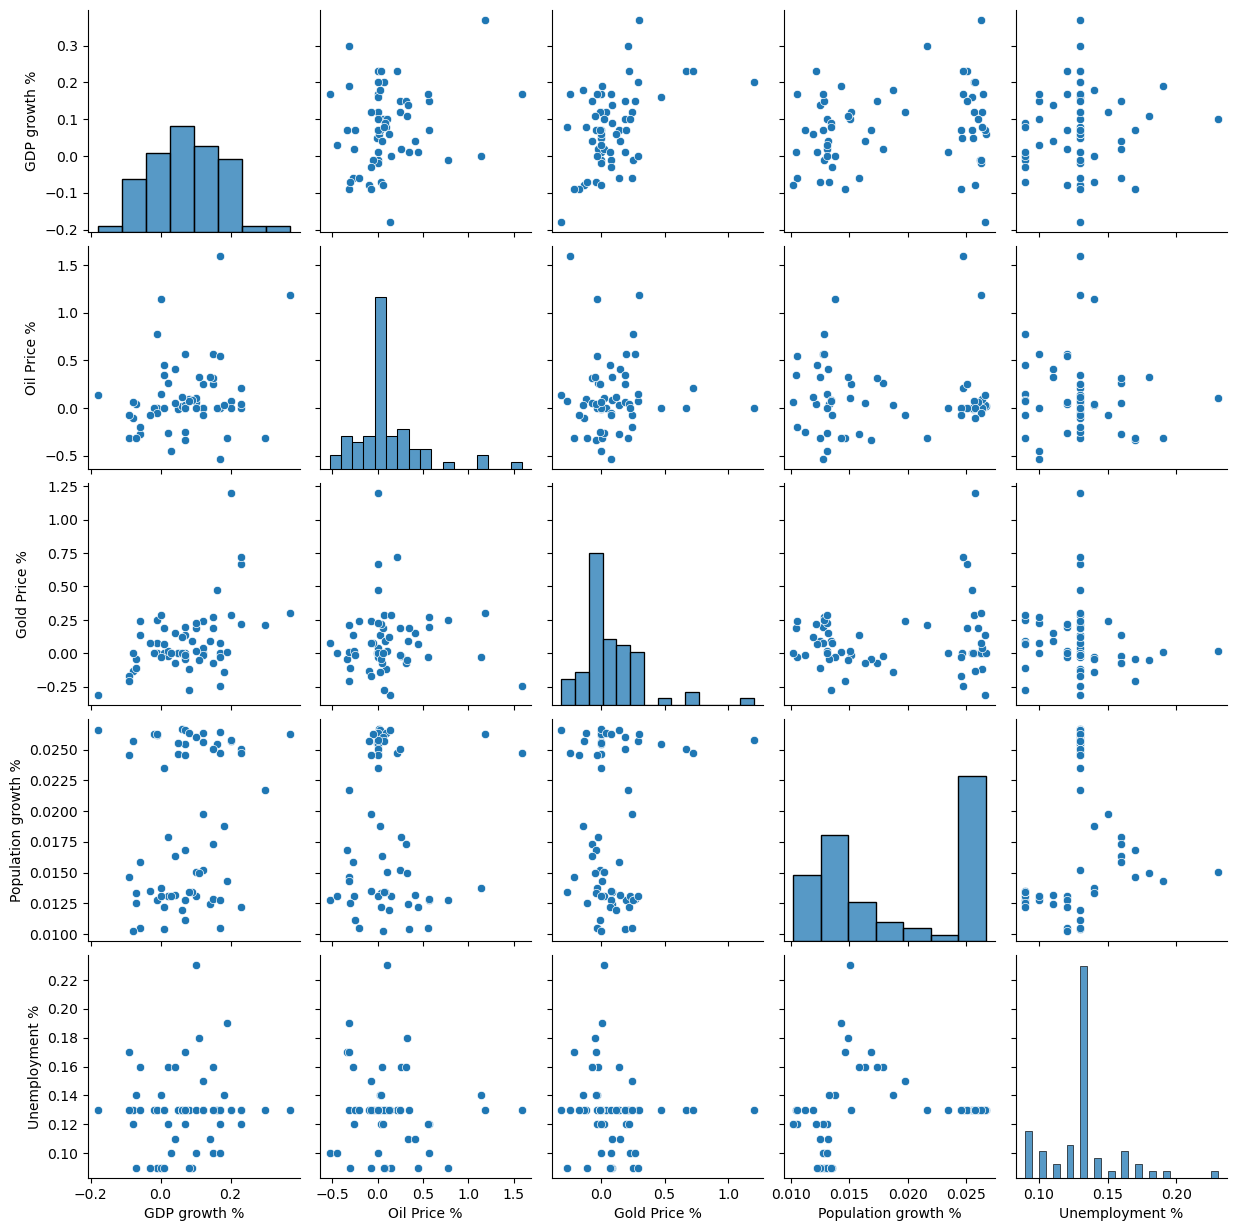

In [6]:
sns.pairplot(data[["GDP growth %", "Oil Price %", "Gold Price %", "Population growth %", "Unemployment %"]])

### 1- Correlation Analysis :

<Axes: >

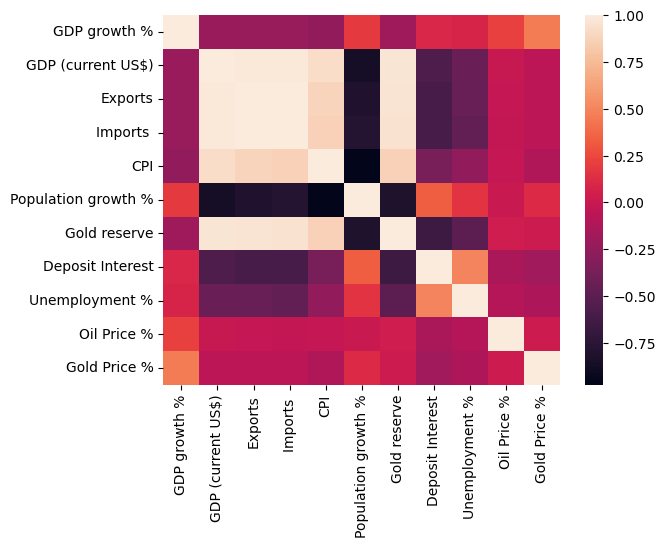

In [7]:
sns.heatmap(data.corr())

### 2- Dimensionality Reduction using PCA :

In [8]:
x0 = data[["GDP growth %", "GDP (current US$)", "Exports", 
           "Imports ", "Population growth %", "Gold reserve", 
           "Deposit Interest", "Unemployment %", "Oil Price %", "Gold Price %"]]

x0_std = StandardScaler().fit_transform(x0)
model_dim = PCA(n_components=10)
X_reduced = model_dim.fit_transform(x0_std)

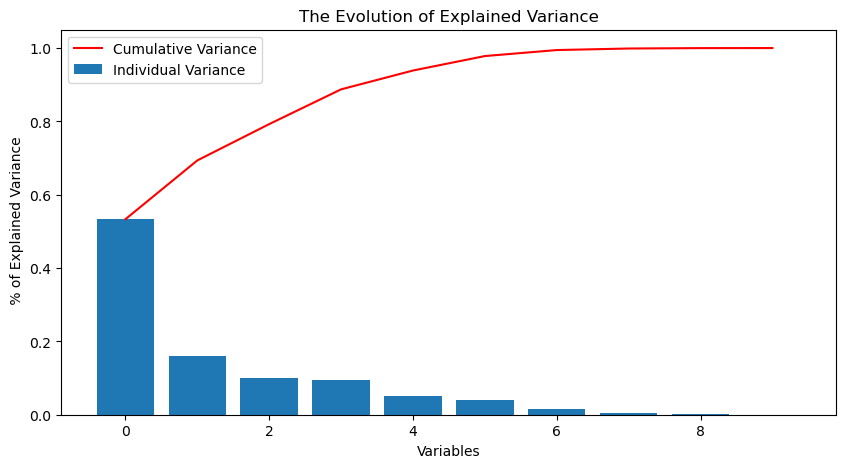

In [9]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(model_dim.explained_variance_ratio_), c="red")
plt.bar(range(0,10),model_dim.explained_variance_ratio_)
plt.ylabel(" % of Explained Variance")
plt.xlabel("Variables")
plt.legend(["Cumulative Variance", "Individual Variance"])
plt.title("The Evolution of Explained Variance")
plt.show()

## Data Partition :

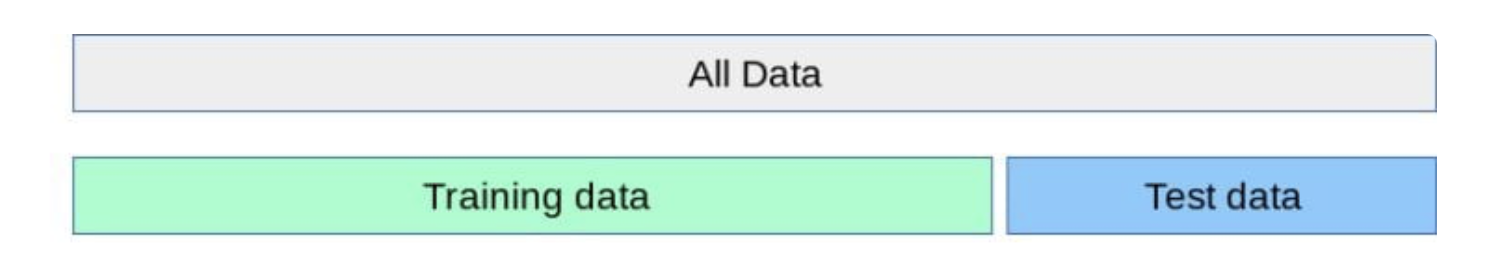

In [10]:
x = data[["GDP growth %", "Unemployment %", "Imports ", "Exports", "Population growth %", "Gold reserve"]]
y = data["CPI"]

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print("The Shape of y_train is:", x_train.shape)
print("The Shape of x_test is:", x_test.shape)
print("The Shape of y_train is:", y_train.shape)
print("The Shape of y_test is:", y_test.shape)

The Shape of y_train is: (44, 6)
The Shape of x_test is: (19, 6)
The Shape of y_train is: (44,)
The Shape of y_test is: (19,)


## Random Forest Modelization :

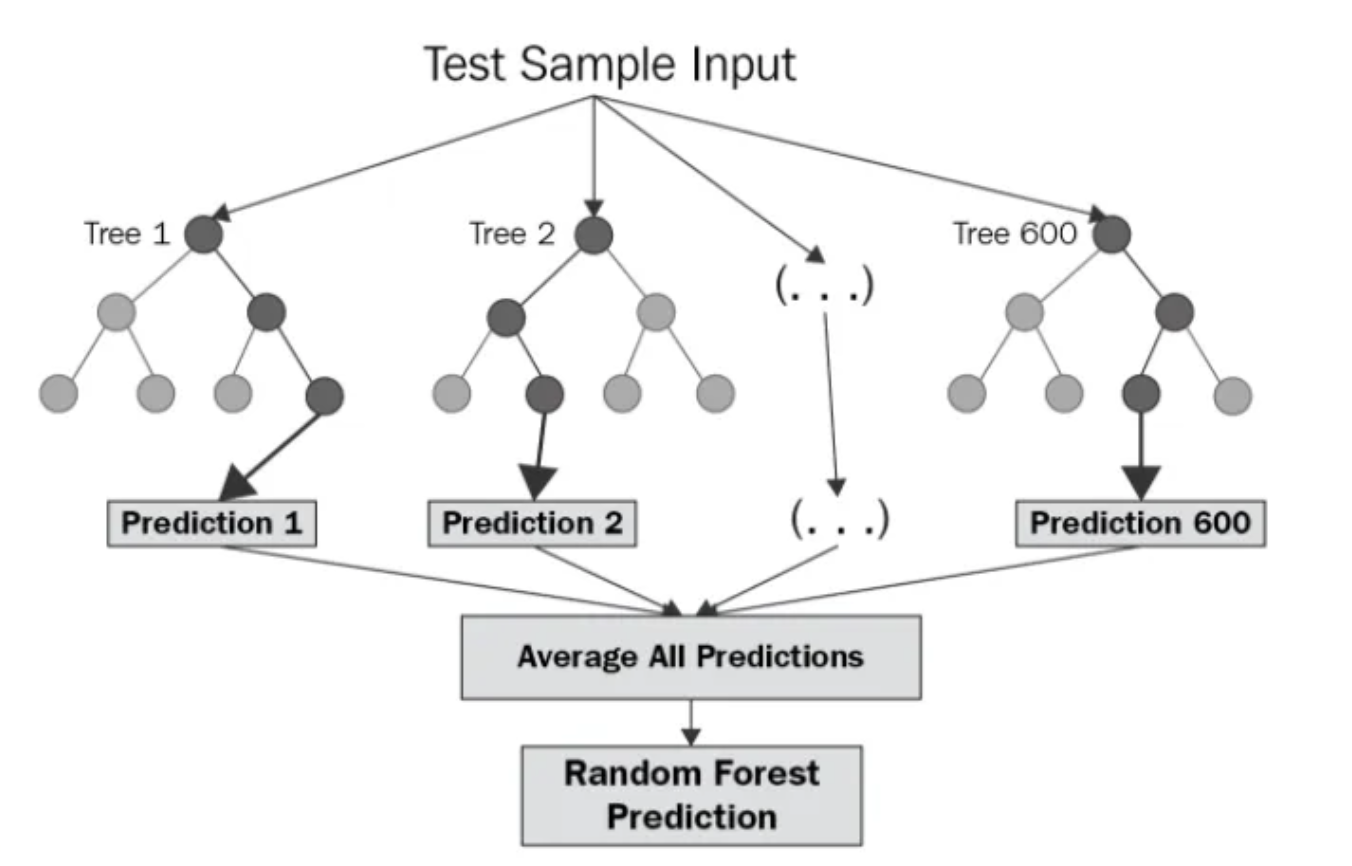

In [12]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
yhat = model.predict(x_test) 

In [13]:
MSE_score = mean_squared_error(y_test, yhat)
RMSE_score = MSE_score**1/2
R2_score = r2_score(y_test, yhat)
print("MSE Score:", MSE_score)
print("RMSE Score:", RMSE_score)
print("R2 Score:", R2_score)

MSE Score: 7.21645147105268
RMSE Score: 3.60822573552634
R2 Score: 0.9944214346480847


In [14]:
n = 1 
R2 = []
Loss = []
while n <= 300: 
    model = RandomForestRegressor(n_estimators=n)
    model.fit(x_train, y_train)
    yhat = model.predict(x_test)
    R2.append(r2_score(y_test, yhat))
    Loss.append(mean_squared_error(y_test, yhat))
    n = n+1

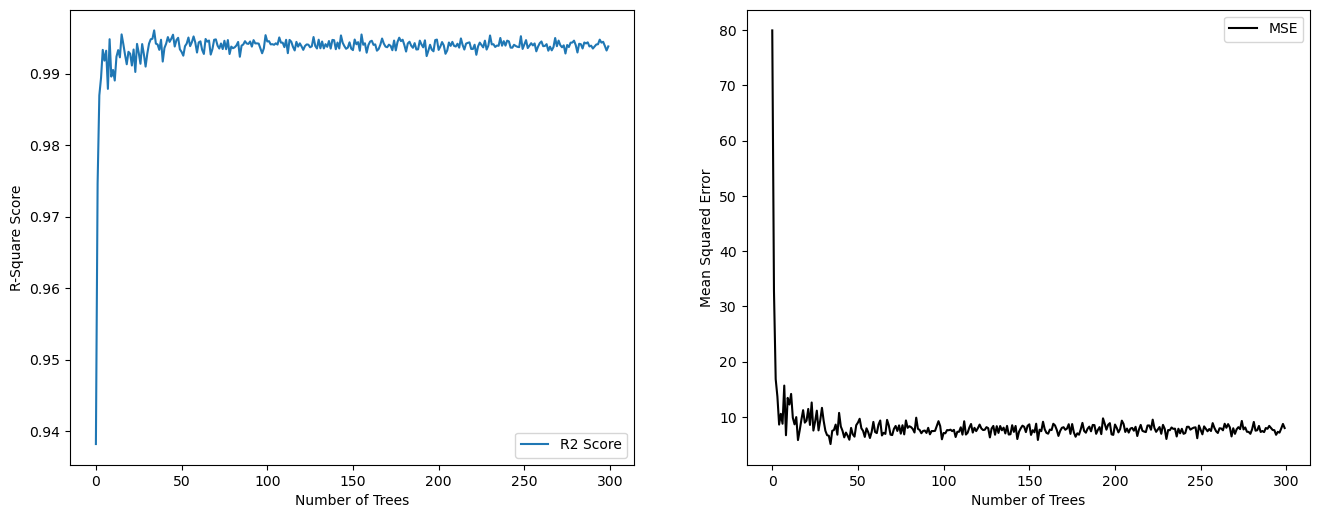

In [15]:
plt.figure(figsize=(16,13))

plt.subplot(2, 2, 1)
plt.plot(R2)
plt.xlabel('Number of Trees')
plt.ylabel('R-Square Score')
plt.legend(['R2 Score'])

plt.subplot(2, 2, 2)
plt.plot(Loss, c="black")
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.legend(['MSE'])

plt.show()

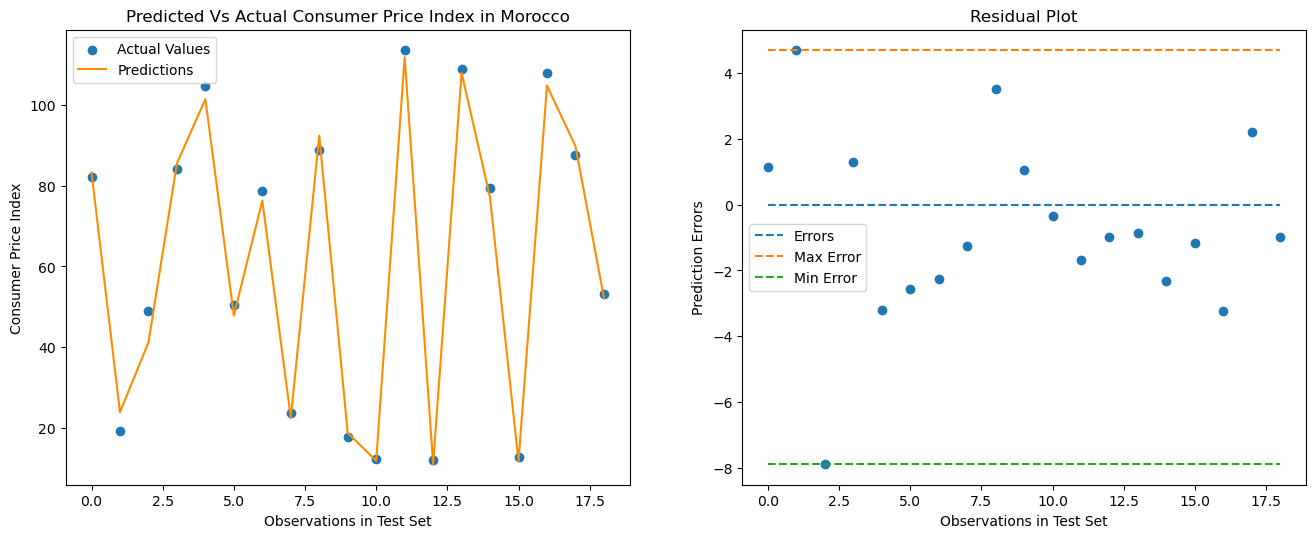

In [16]:
max_error = []
min_error = []
error = yhat - y_test 
for i in range(len(error)): 
    max_error.append(max(error))
    min_error.append(min(error))
    
plt.figure(figsize=(16,13))
plt.subplot(2, 2, 1)
plt.scatter(range(len(y_test)), y_test)
plt.plot(yhat, c="darkorange" )
plt.ylabel("Consumer Price Index")
plt.xlabel("Observations in Test Set")
plt.legend(["Actual Values","Predictions"])
plt.title("Predicted Vs Actual Consumer Price Index in Morocco")
plt.subplot(2, 2, 2)
plt.plot(np.zeros(len(error)), linestyle='dashed')
plt.plot(max_error, linestyle='dashed')
plt.plot(min_error, linestyle='dashed')
plt.scatter(range(19), error)
plt.xlabel("Observations in Test Set")
plt.ylabel("Prediction Errors")
plt.legend(["Errors", "Max Error", "Min Error"])
plt.title("Residual Plot")
plt.show()